In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### About The Dataset :

**age**: Age of the patient

**sex**: Sex of the patient
 - 1 = Male
 
 - 0 = Female

**cp**: Chest pain type
 - 1 = Typical Angina

 - 2 = Atypical Angina

 - 3 = Non-anginal Pain

 - 4 = Asymptomatic

**trtbps**: Resting blood pressure (in mm Hg)

**chol**: Cholestoral in mg/dl fetched via BMI sensor

**fbs**: (fasting blood sugar > 120 mg/dl)
 - 1 = True

 - 0 = False

**restecg**: Resting electrocardiographic results
 - 0 = Normal 

 - 1 = ST-T wave normality

 - 2 = Left ventricular hypertrophy

**thalachh**: Maximum heart rate achieved

**oldpeak**: Previous peak. ST depression induced by exercise relative to rest

**slp**: Slope. The slope of the peak exercise ST segment
 - 0 = unsloping

 - 1 = flat

 - 2 = downsloping

**caa**: Number of major vessels ~ (0,3)

**thall**: Thalassemia. Thalium Stress Test result ~ (0,3)
 - 0 = null

 - 1 = fixed defect

 - 2 = normal

 - 3 = reversable defect

**exang**: Exercise induced angina 
 - 1 = Yes

 - 0 = No

**output**: Target variable. Diagnosis of heart disease (angiographic disease status)
 - 0 = < 50% diameter narrowing. less chance of heart disease

 - 1 = > 50% diameter narrowing. more chance of heart disease

In [2]:
heart_df = pd.read_csv("../data/raw/heart_disease_original_data.csv")
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [5]:
print('Number of rows is',heart_df.shape[0], 'and number of columns is',heart_df.shape[1])

Number of rows is 303 and number of columns is 14


In [6]:
heart_df.isnull().sum()/len(heart_df)*100

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
num         0.000000
dtype: float64

In [9]:
heart_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [10]:
heart_df[heart_df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [11]:
heart_df.drop_duplicates(keep='first',inplace=True)

In [13]:
print('Number of rows is',heart_df.shape[0], 'and number of columns is',heart_df.shape[1])

Number of rows is 303 and number of columns is 14


In [16]:
heart_df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


<Axes: >

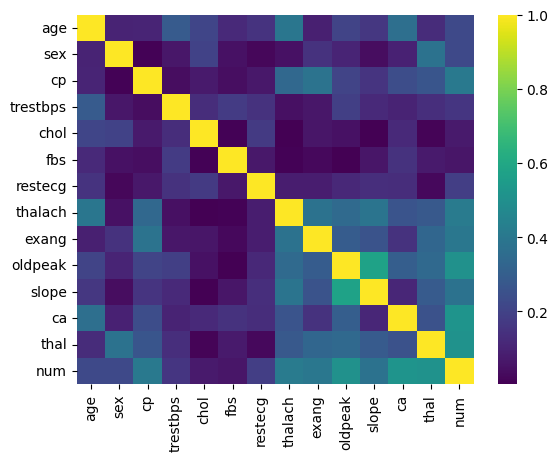

In [20]:
sns.heatmap(abs(heart_df.corr()), cmap='viridis')

In [23]:
heart_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.504092


The gender distribution is: 97 women and 206 men


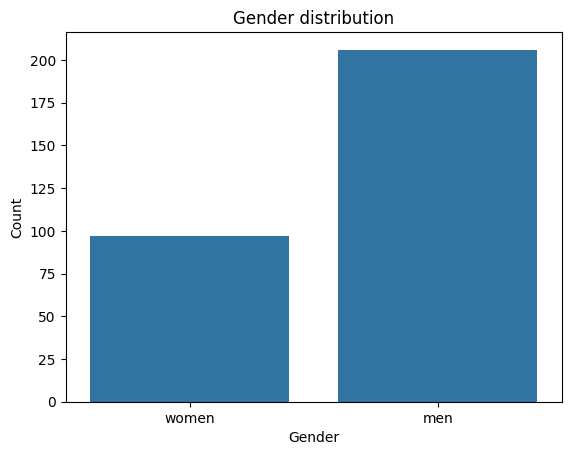

In [39]:
x=(heart_df.sex.value_counts())
print(f'The gender distribution is: {x[0]} women and {x[1]} men')
p = sns.countplot(data=heart_df, x="sex")
plt.xticks(ticks=[0,1], labels=['women', 'men'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')
plt.show()

cp
4    144
3     86
2     50
1     23
Name: count, dtype: int64


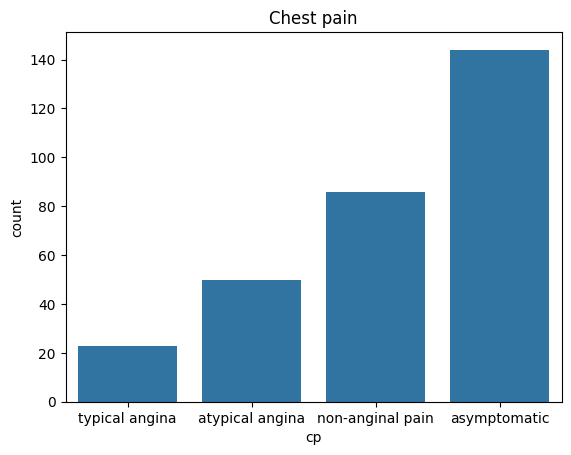

In [38]:
x=(heart_df.cp.value_counts())
print(x)
p = sns.countplot(data=heart_df, x="cp")
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.title('Chest pain')
plt.show()

fbs
0    258
1     45
Name: count, dtype: int64


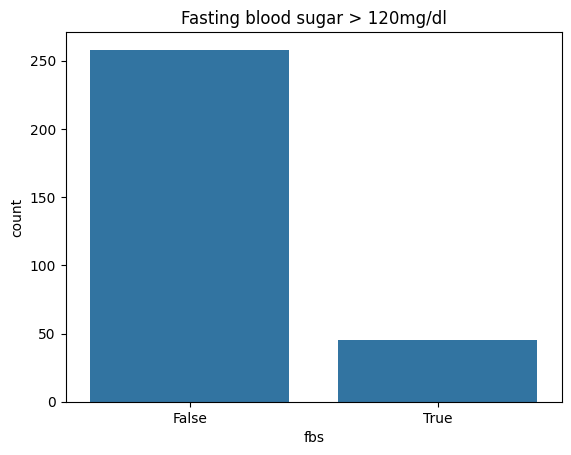

In [42]:
x=(heart_df.fbs.value_counts())
print(x)
p = sns.countplot(data=heart_df, x="fbs")
plt.xticks(ticks=[0, 1], labels=[False, True])
plt.title('Fasting blood sugar > 120mg/dl')
plt.show()

restecg
0    151
2    148
1      4
Name: count, dtype: int64


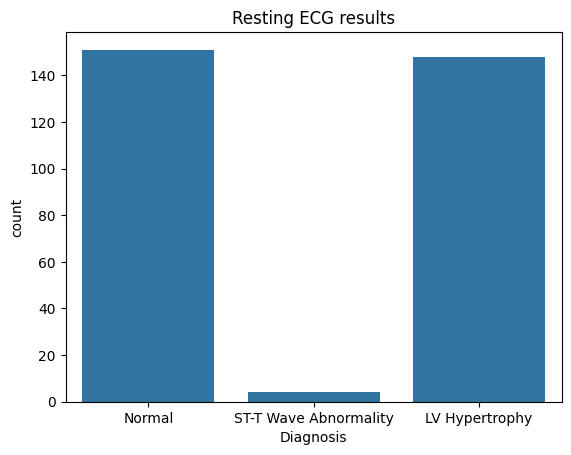

In [47]:
x=(heart_df.restecg.value_counts())
print(x)
p = sns.countplot(data=heart_df, x="restecg")
plt.xticks(ticks=[0,1,2], labels=['Normal', 'ST-T Wave Abnormality', 'LV Hypertrophy'])
plt.title('Resting ECG results')
plt.xlabel('Diagnosis')
plt.show()

exang
0    204
1     99
Name: count, dtype: int64


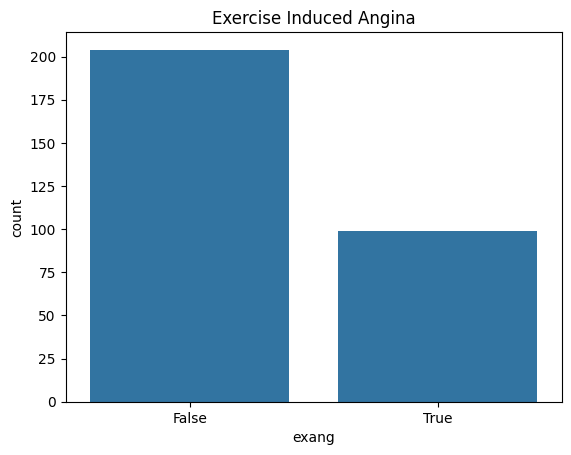

In [50]:
x=(heart_df.exang.value_counts())
print(x)
p = sns.countplot(data=heart_df, x="exang")
plt.xticks(ticks=[0,1], labels=[False, True])
plt.title('Exercise Induced Angina')
plt.show()

exang
0    204
1     99
Name: count, dtype: int64


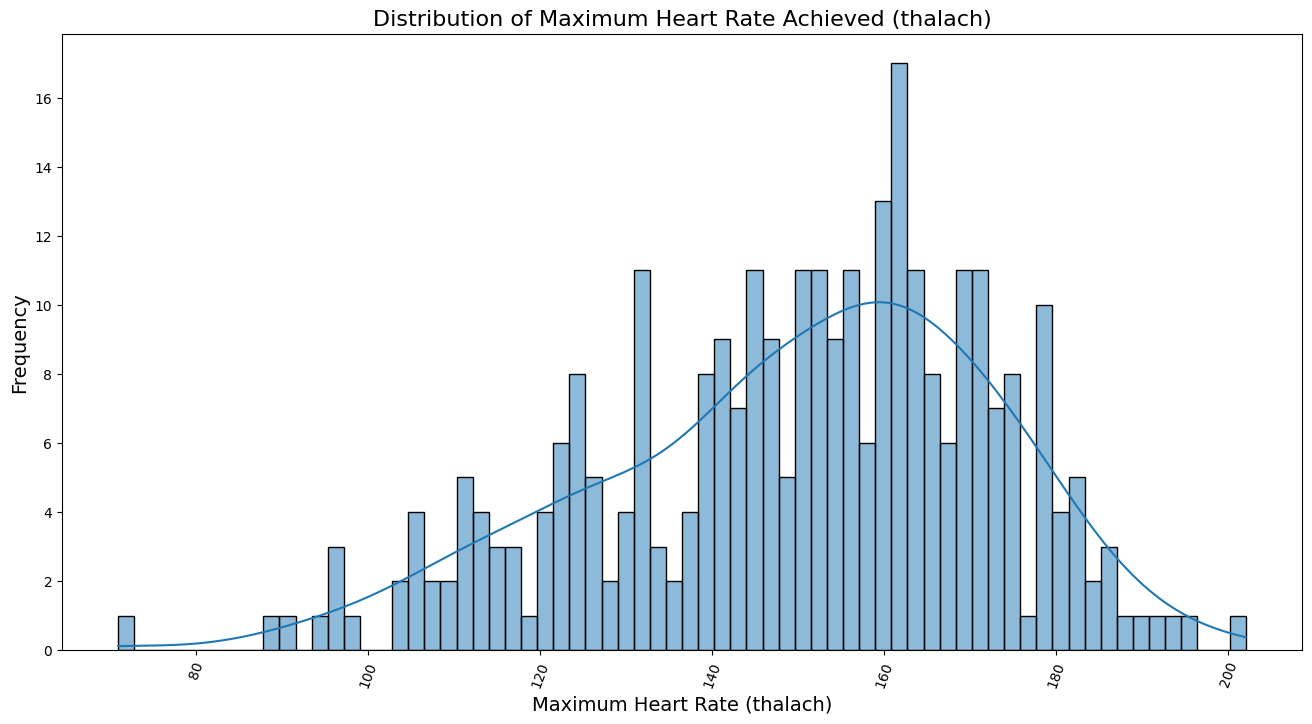

In [63]:

plt.figure(figsize=(16,8))
print(x)
sns.histplot(data=heart_df, x="thalach", kde=True, bins=70)
plt.xticks(rotation=70)
plt.title("Distribution of Maximum Heart Rate Achieved (thalach)", fontsize=16)
plt.xlabel("Maximum Heart Rate (thalach)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

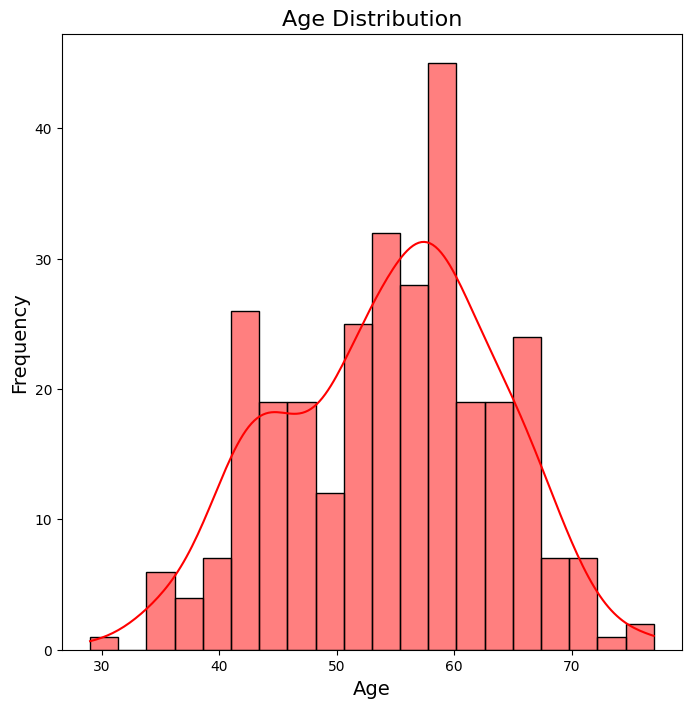

In [73]:
plt.figure(figsize=(8,8))
sns.histplot(heart_df.age, color="red", label="Age", kde=True, bins=20)
# plt.legend()
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

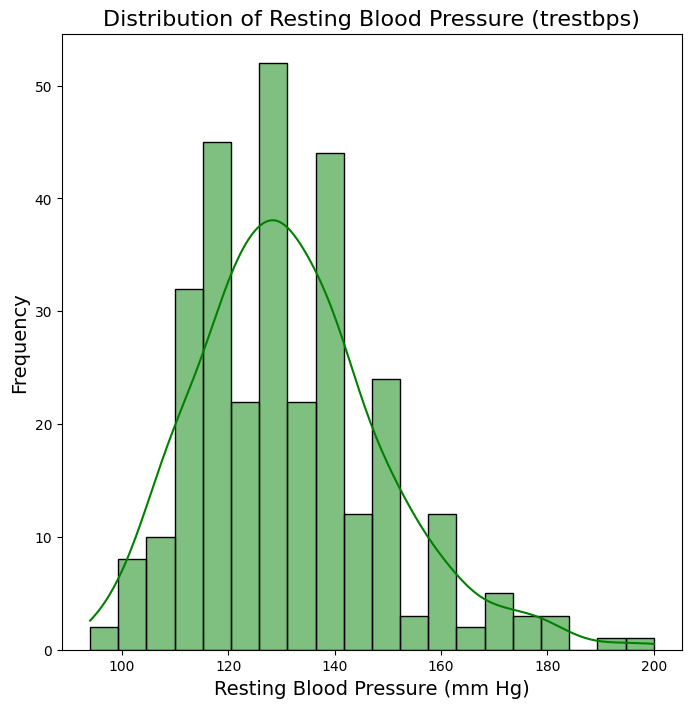

In [78]:
plt.figure(figsize=(8,8))
sns.histplot(heart_df.trestbps, color="green", label="Resting Blood Pressure", kde=True, bins=20)
plt.title("Distribution of Resting Blood Pressure (trestbps)", fontsize=16)
plt.xlabel("Resting Blood Pressure (mm Hg)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()

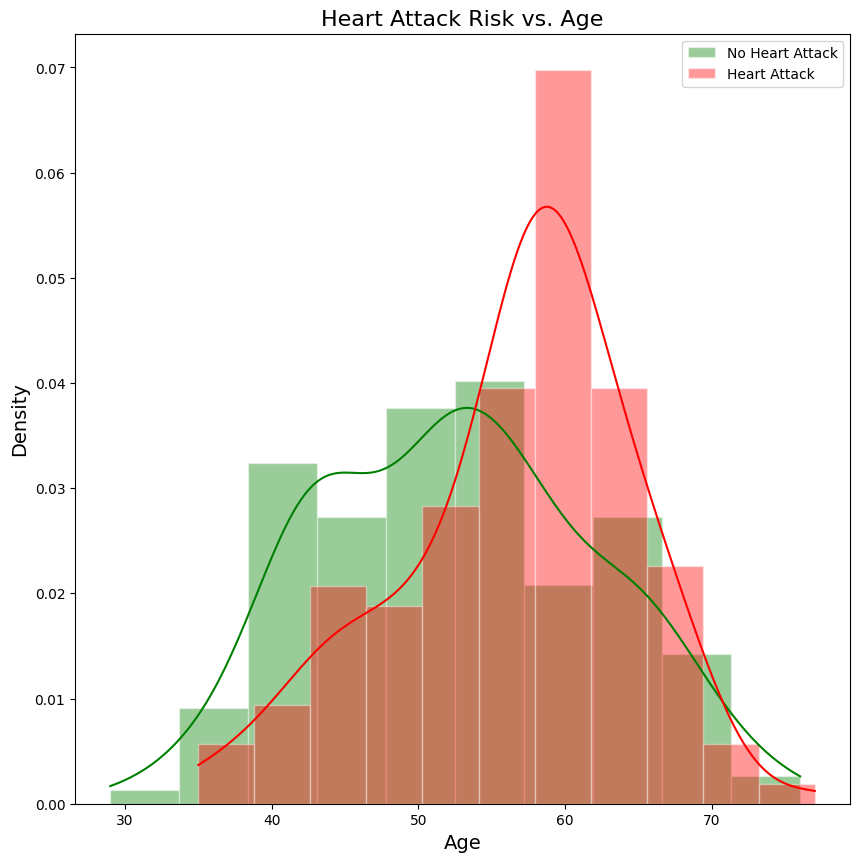

In [79]:
plt.figure(figsize=(10,10))
sns.histplot(heart_df[heart_df['num'] == 0]["age"], color='green',kde=True, stat="density", alpha=.4, edgecolor=(1, 1, 1, .4), label='No Heart Attack')
sns.histplot(heart_df[heart_df['num'] >= 1]["age"], color='red',kde=True, stat="density", alpha=.4, edgecolor=(1, 1, 1, .4), label='Heart Attack')
plt.legend()
plt.title('Heart Attack Risk vs. Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

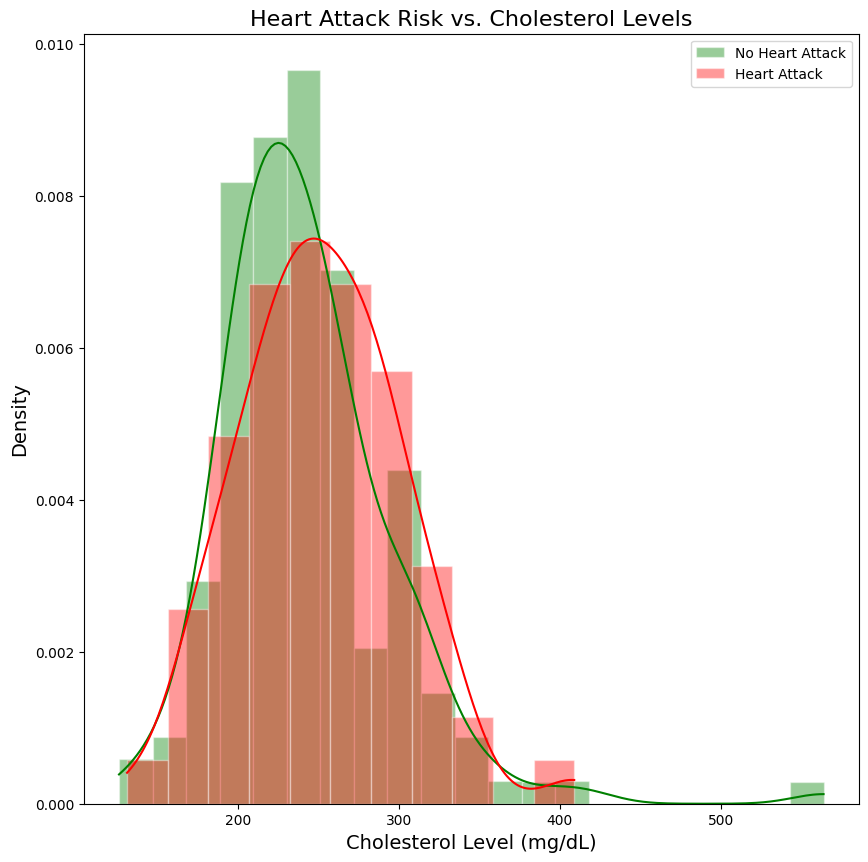

In [82]:
plt.figure(figsize=(10,10))
sns.histplot(heart_df[heart_df['num'] == 0]["chol"], color='green',kde=True, stat="density", alpha=.4, edgecolor=(1, 1, 1, .4), label='No Heart Attack')
sns.histplot(heart_df[heart_df['num'] >= 1]["chol"], color='red',kde=True, stat="density", alpha=.4, edgecolor=(1, 1, 1, .4), label='Heart Attack')
plt.legend()
plt.title('Heart Attack Risk vs. Cholesterol Levels', fontsize=16)
plt.xlabel('Cholesterol Level (mg/dL)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

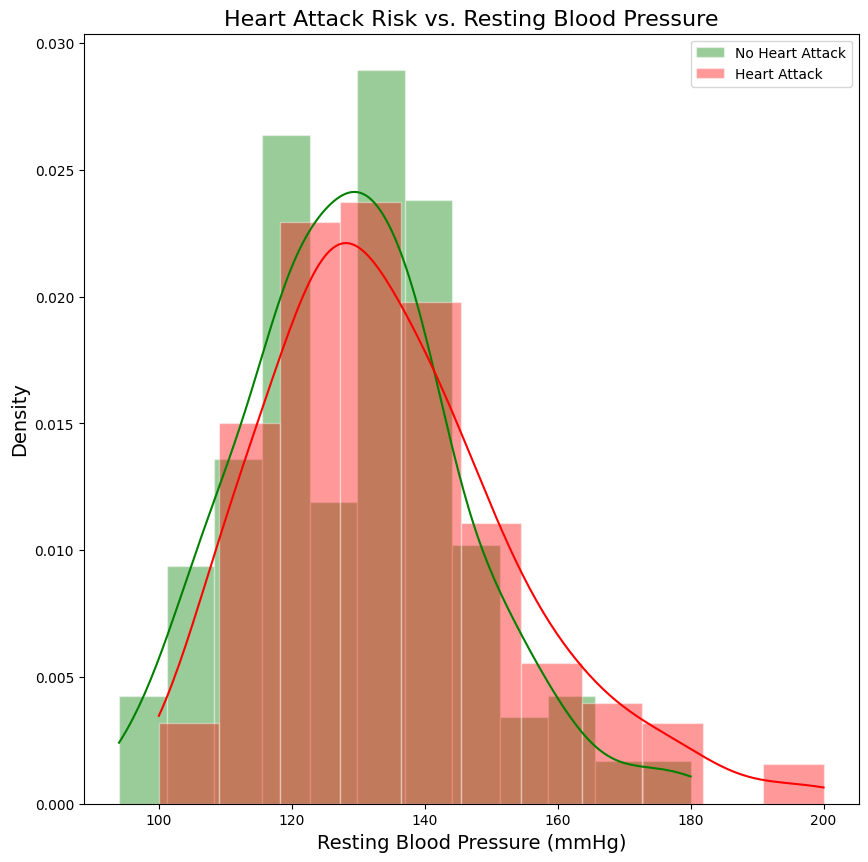

In [83]:

plt.figure(figsize=(10,10))
sns.histplot(heart_df[heart_df['num'] == 0]["trestbps"], color='green',kde=True, stat="density", alpha=.4, edgecolor=(1, 1, 1, .4), label='No Heart Attack')
sns.histplot(heart_df[heart_df['num'] >= 1]["trestbps"], color='red',kde=True, stat="density", alpha=.4, edgecolor=(1, 1, 1, .4), label='Heart Attack')
plt.legend()
plt.title('Heart Attack Risk vs. Resting Blood Pressure', fontsize=16)
plt.xlabel('Resting Blood Pressure (mmHg)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


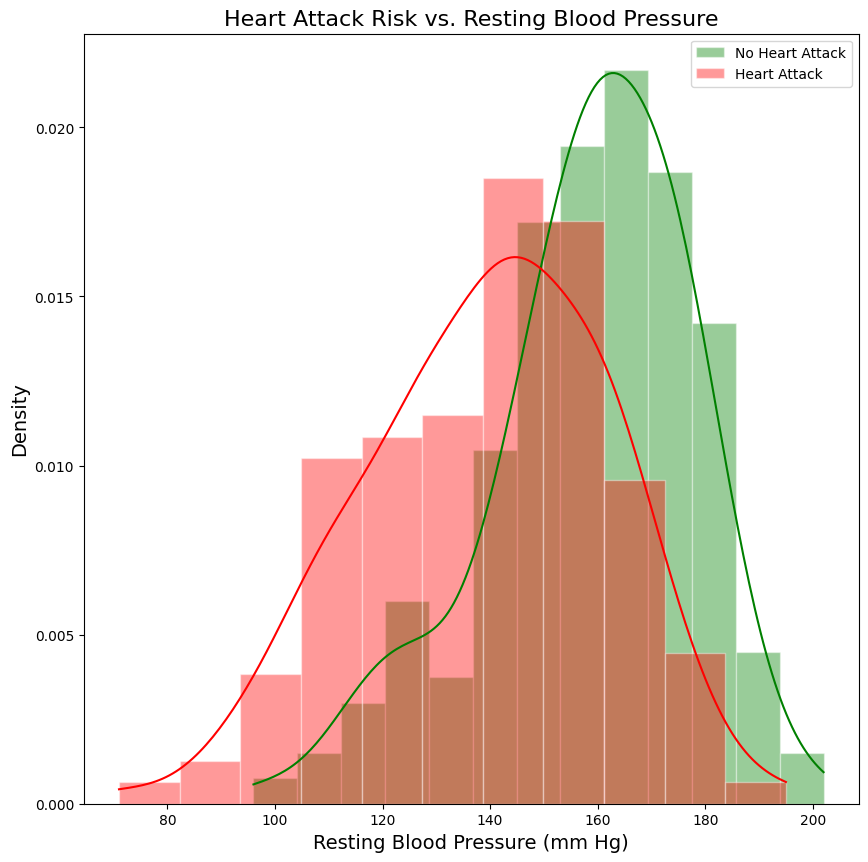

In [84]:
plt.figure(figsize=(10,10))
sns.histplot(heart_df[heart_df['num'] == 0]["thalach"], color='green',kde=True, stat="density", alpha=.4, edgecolor=(1, 1, 1, .4), label='No Heart Attack')
sns.histplot(heart_df[heart_df['num'] >= 1]["thalach"], color='red',kde=True, stat="density", alpha=.4, edgecolor=(1, 1, 1, .4), label='Heart Attack')
plt.legend()
plt.title('Heart Attack Risk vs. Resting Blood Pressure', fontsize=16)
plt.xlabel('Resting Blood Pressure (mm Hg)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

In [85]:
# plt.figure(figsize=(20,20))
# sns.pairplot(heart_df)
# plt.show()

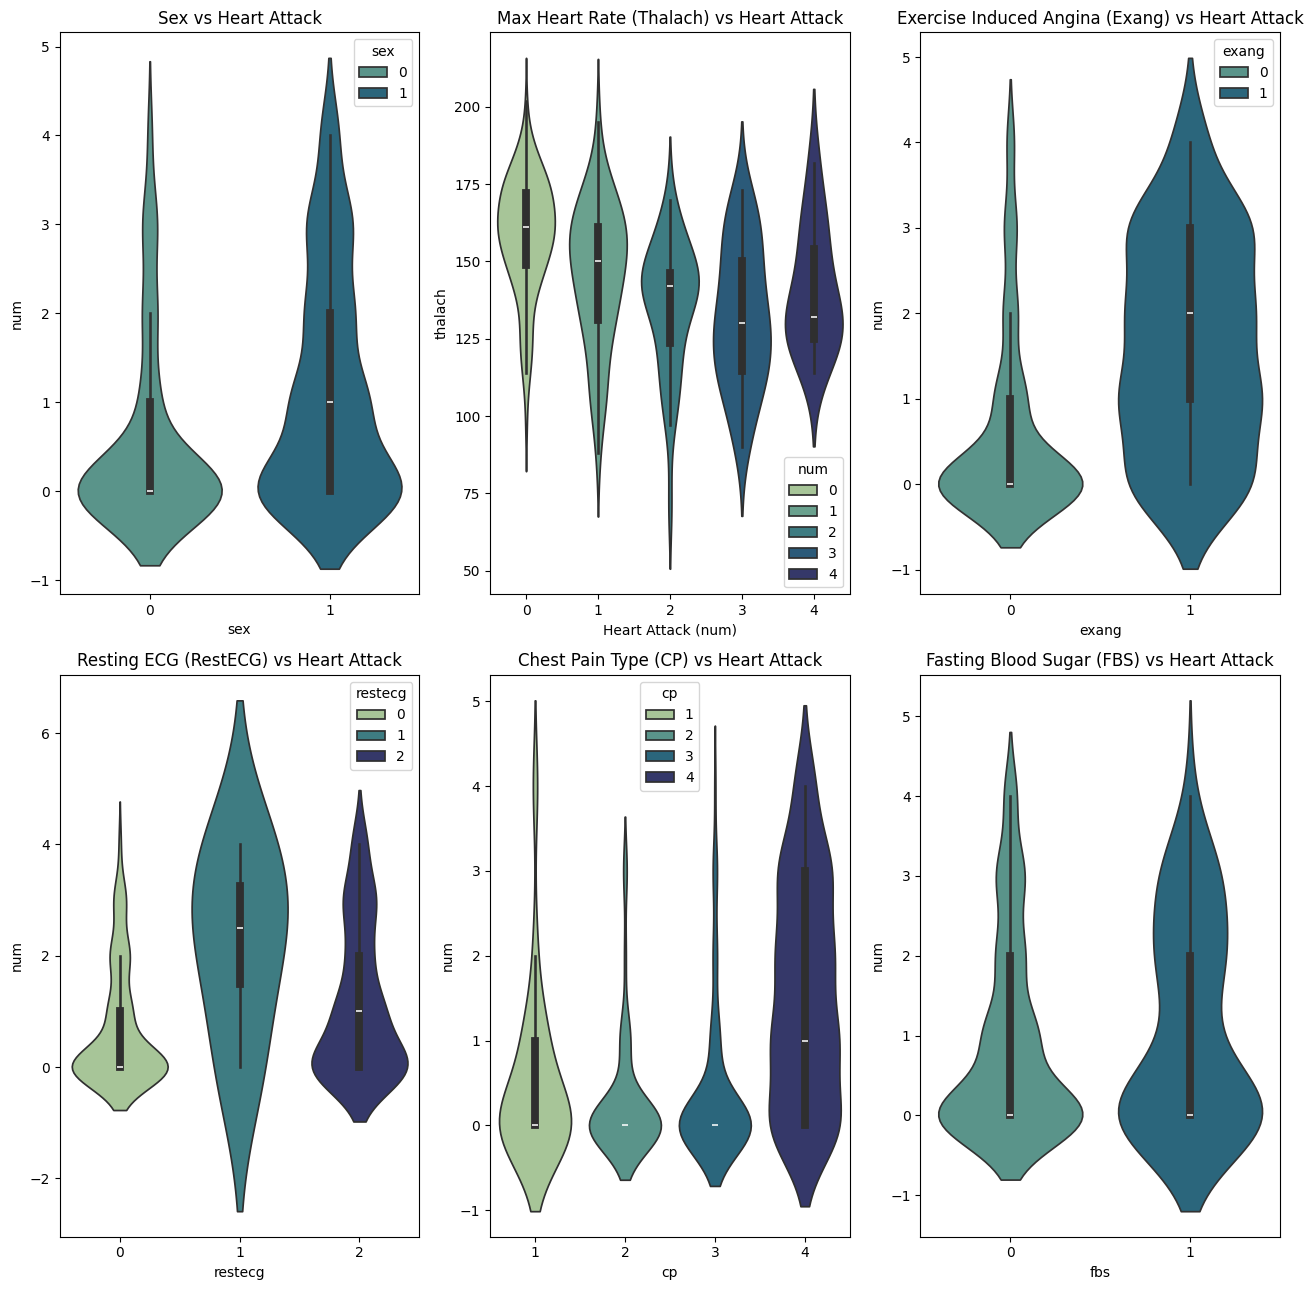

In [90]:
plt.figure(figsize=(13, 13))

# Plot 1: Sex vs Num
plt.subplot(2, 3, 1)
sns.violinplot(x='sex', y='num', data=heart_df, hue='sex', palette='crest')
plt.title('Sex vs Heart Attack')

# Plot 2: Thalach vs Num (updated)
plt.subplot(2, 3, 2)
sns.violinplot(x='num', y='thalach', data=heart_df, hue='num', palette='crest')
plt.title('Max Heart Rate (Thalach) vs Heart Attack')
plt.xlabel('Heart Attack (num)')

# Plot 3: Exang vs Num
plt.subplot(2, 3, 3)
sns.violinplot(x='exang', y='num', data=heart_df, hue='exang', palette='crest')
plt.title('Exercise Induced Angina (Exang) vs Heart Attack')

# Plot 4: RestECG vs Num
plt.subplot(2, 3, 4)
sns.violinplot(x='restecg', y='num', data=heart_df, hue='restecg', palette='crest')
plt.title('Resting ECG (RestECG) vs Heart Attack')

# Plot 5: CP vs Num
plt.subplot(2, 3, 5)
sns.violinplot(x='cp', y='num', data=heart_df, hue='cp', palette='crest')
plt.title('Chest Pain Type (CP) vs Heart Attack')

# Plot 6: FBS vs Num
plt.subplot(2, 3, 6)
sns.violinplot(x='fbs', y='num', data=heart_df, hue='fbs', palette='crest', legend=False)
plt.title('Fasting Blood Sugar (FBS) vs Heart Attack')

# Adjust layout
plt.tight_layout()
plt.show()